# Numerical optimization

## Consumption & labor supply

Assume that a household (or individual) has preferences over consumption and leisure characterized by the following utility function,
$$
u(c,h) = 
\underbrace{\frac{c^{1-\gamma} - 1}{1-\gamma}}_{\text{Utility from consumption}} 
- 
\underbrace{\psi \frac{h^{1+1/\theta}}{1+1/\theta}}_{\text{Disutility from work}}
$$
where $c \geq 0$ is the amount consumed, and $h \geq 0$ (for "hours") is the amount of labor the household wishes to work (the remaining time is then consumed as leisure). The household does not like working, and therefore the amount of hours worked enters as a disutility term in the utility function.
Note that for the special case of $\gamma = 1$, the utility from consumption becomes $\log(c)$,
the natural logarithm of $c$, so that
$$
u(c,h) = \log(c) - \psi \frac{h^{1+1/\theta}}{1+1/\theta}
$$

Using standard parameter values (for example $\gamma = 1$, $\psi=1$, and $\theta = 0.5$), we can visualize these individual utility components as follows:

Text(0.5, 1.0, 'Working disutility $\\psi\\frac{h^{1+1/\\theta}}{1+1/\\theta}$')

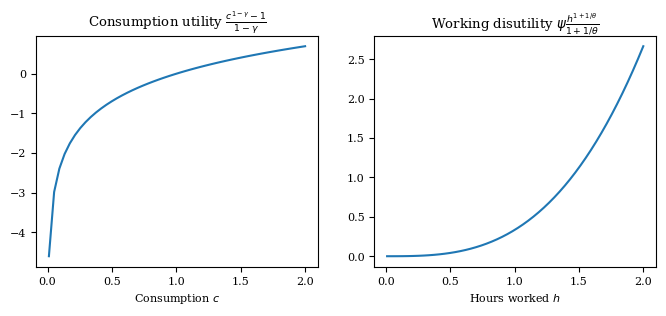

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))
xvalues = np.linspace(0.01, 2, 50)
ax0.plot(xvalues, np.log(xvalues))
ax0.set_xlabel(r'Consumption $c$')
ax0.set_title(r'Consumption utility $\frac{c^{1-\gamma}-1}{1-\gamma}$')
ax1.plot(xvalues, xvalues**3/3)
ax1.set_xlabel(r'Hours worked $h$')
ax1.set_title(r'Working disutility $\psi\frac{h^{1+1/\theta}}{1+1/\theta}$')


In this section we want to study the optimal choice of consumption and leisure subject to the budget constraint
$$
c = a + w\cdot h
$$
where $a$ is the initial endowment of financial assets, and $w$ is the wage rate for one unit of labor.

### Analytical solution

Before we turn to numerical optimization, we can use the first-order conditions (FOCs) to characterize the optimal solution, and even find a analytical solution for some parameter values.

To derive the first-order conditions, we set up the Lagrangian,
$$
\mathcal{L} = \frac{c^{1-\gamma} - 1}{1-\gamma} - \psi \frac{h^{1+1/\theta}}{1+1/\theta}
 + \lambda \Bigl(a + w\cdot h - c \Bigr)
$$
where we ignore the non-negativity conditions $c\geq 0$ and $h\geq 0$ as these will hold at the optimum.
The first-order conditions are then obtained by taking the derivate with respect to the choice variables $c$ and $h$:
$$
\left.
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial c} &= c^{-\gamma} - \lambda = 0 \\
\frac{\partial \mathcal{L}}{\partial h} &= -\psi h^{1/\theta} - \lambda w = 0
\end{aligned}
\right\rbrace
\Longrightarrow
c^{-\gamma} = \psi \frac{h^{1/\theta}}{w}
$$
Combining these two equation yields the optimality condition to the right which characterizes how the
optimally chosen consumption and labor supply are interlinked.

We can use the budget contraint $c = a + w\cdot h$ to substitute out $c$ so that ultimately 
have a single equation in a single unknown, $h$:
$$
\bigl(a + w\cdot h\bigr)^{-\gamma} = \psi \frac{h^{1/\theta}}{w}
$$
Note that this is a non-linear equation which in general does not have an analytical (so-called "closed-form") solution.

#### Special case with analytical solution

We can simplify the problem if we assume that $\gamma = 1$ and $a = 0$ as 
then the previous equation admits a simple solution:
$$
\bigl(w\cdot h\bigr)^{-1} = \psi \frac{h^{1/\theta}}{w}
\Longrightarrow
h^{1+1/\theta} = \frac{1}{\psi}
\Longrightarrow
h = \psi^{-\frac{1}{1+1/\theta}}
$$
Optimal consumption then follows from the budget constraint and is given by
$$
c = w\cdot h = w\cdot \psi^{-\frac{1}{1+1/\theta}}
$$

### Numerical solution with grid search

If we don't impose the simplifying assumptions from the previous section, we have to solve the model numerically for a given set of parameters. As a first step, we can do this using grid search which we have already encountered earlier in the course.

One problem is that we might not know which grid boundaries to use as we don't know where the solution is located. However, by inspecting the graphs above we see that the utility from more consumption is concave (the *additional* utility from consuming more keeps diminishing), whereas the disutility from working is convex (the *additional* disutility of working keeps increasing). Consequently, at some point the household cannot be better off by working more to finance additional consumption. The grid of candidate points for $h$
must therefore be bounded, and we can impose some conservatively large upper bound to be sure that the optimum is below that point.

<div class="alert alert-info">
<h3> Your turn</h3>

Before we can locale the optimum numerically, we need to implement
a Python function which returns the utility associated with a choice 
vector <i>(c, h)</i>. 

<ul>
<li>Implement a function with the signature 
<p>
<tt>util(c, h, gamma, psi, theta)</tt> 
</p>
which evaluates utility 
using the formula given above.</li>
<li>Make sure that your implementation correctly handles the cases 
γ = 1 and γ ≠ 1.</li>
</ul>

</div>

Let's start with parametrization which admits an analytical solution so we can compare it to the numerical result.
To this end, assume that $a=0$, $w=2$, $\gamma = 1$, $\psi = 1.5$, and $\theta = 0.5$:

In [2]:
# Parameters
a = 0           # initial assets
w = 2           # wage rate
gamma = 1       # Relative risk aversion
psi = 1.5       # weight on disutility of labor
theta = 0.5     # labor supply elasticity

For the grid search algorithm, we need to define a grid (array) of candidate labor supply choices at which we evaluate utility to determine the best among these candidates:

In [3]:
import numpy as np

# Number of grid points
N = 11

# Create candidate grid of hours worked
h_grid = np.linspace(0.1, 2, N)

For each point on the labor supply grid, the budget constraint delivers the corresponding level of consumption:

In [4]:
# Recover consumption from budget constraint
c_grid = a + w * h_grid

With a grid for consumption and hours worked at hand, we are able to evaluate the associated utility level using the following implementation of the utility function:

In [5]:
import numpy as np

def util(c, h, gamma, psi, theta):
    """
    Compute the utility of a given consumption/labor supply choice.
    """

    # Consumption utility
    if gamma == 1:
        # Log utility
        u = np.log(c)
    else:
        # General CRRA utility
        u = (c**(1-gamma) - 1) / (1-gamma)

    # add disutility of labor
    u -= psi * h**(1 + 1/theta) / (1 + 1/theta)

    return u

Note that we have written the utility function in a vectorized fashion, hence we can evaluate the associated utility for all points on the candidate grid at once:

In [6]:
# Evaluate utility for each consumption/hours choice
u_grid = util(c_grid, h_grid, gamma, psi, theta)

We can then plot these utility levels as a function of each candidate number of hours worked on the grid:

Text(0, 0.5, 'Utility')

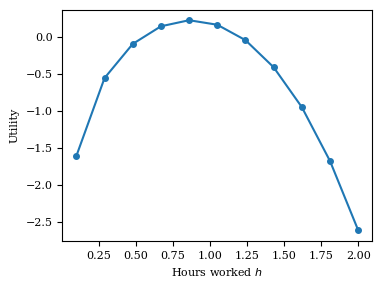

In [7]:
import matplotlib.pyplot as plt

plt.plot(h_grid, u_grid, marker='o', ms=4)
plt.xlabel(r'Hours worked $h$')
plt.ylabel('Utility')

As you can see, the associated utility is hump-shaped in the hours worked: given that there are no initial assets, the household is initially better off to work more hours to finance consumption. At some point, the additional disutility of working even more gets so large that it negates any gains from consuming more, so the overall utility level starts declining for higher labor supply.

We can now use 
[`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html)
to get the *index* at which utility is maximized. This index can then be used to retrieve the maximizing consumption and hours worked from their respective grids.

In [8]:
# Locate index where utility is maximized
imax = np.argmax(u_grid)

# Recover the maximizing hours and consumption choices
h_opt = h_grid[imax]
c_opt = c_grid[imax]

# Recover the maximized utility level
u_max = u_grid[imax]

print(f'Utility is maximized at c={c_opt}, h={h_opt}; u_max={u_max:.3f}')

Utility is maximized at c=1.72, h=0.86; u_max=0.224


We can also augment the graph we created previously to indicate where the maximum is located.

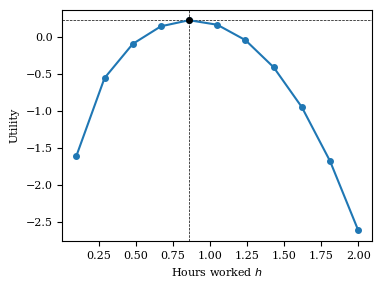

In [9]:
plt.plot(h_grid, u_grid, marker='o', ms=4)
plt.plot([h_opt], [u_max], marker='o', color='black', ms=4)
plt.xlabel(r'Hours worked $h$')
plt.ylabel('Utility')

# Add lines to indicate the maximum
plt.axhline(u_max, ls='--', color='black', lw=0.5, zorder=-1)
plt.axvline(h_opt, ls='--', color='black', lw=0.5, zorder=-1)

#### Comparing to the analytical solution

Since we choose the parameters such that an analytical solution can be computed, we now compare the analytical and numerical allocations.

In [10]:
# Compute analytical solution using the formulas from above

# Analytical (exact) hours worked
h_exact = psi**(-1/(1+1/theta))

# Analytical (exact) consumption
c_exact = w * h_exact

# Print exact vs. grid solution
print(f'Exact solution:\n  c = {c_exact:.5f}\n  h = {h_exact:.5f}')
print(f'Grid solution:\n  c = {c_opt:.5f}\n  h = {h_opt:.5f}')

Exact solution:
  c = 1.74716
  h = 0.87358
Grid solution:
  c = 1.72000
  h = 0.86000


As you can see, these numbers are close but not exactly the same (they differ by more than 0.01). This is one draw-back of grid search: by construction, it only locates maxima on the grid, but if the grid is very sparse (as is the case here with only 11 grid points), these need not be close to the true solution.

<div class="alert alert-info">
<h3> Your turn</h3>

Using the code you just wrote, experiment with different numbers of grid points
and re-evaluate the optimal consumption and labor supply choices.
How many grid points do you approximately need to get a solution
that is close to the exact one (with a precision of 3 decimal digits)?

</div>

### Numerical solution using a minimizer

While the grid search algorithm is very robust (it makes no assumptions on the objective function or the choice set), it can deliver results which may be far from the true optimum. We addressed this problem by increasing the number of grid points, which introduces another problem: evaluating a complex objective function on potentially hundreds of candidate points can be computationally very expensive (this of course is not an issue with the trivial problem we are dealing with in this section).

If the problem is well behaved (i.e., the objective function is differentiable or at least smooth, and the choice set is convex), we therefore usually resort to numerical solvers which
implement more efficient algorithms to locate an optimum instead of trying a large set of candidate points. In economics and finance, these algorithms usually fall into two categories:

1. Minimization algorithms operate on the utility function (and constraints) to locate a maximum.
2. Root-finding algorithms operate on the first-order conditions of a problem to locate an
    optimum where there first-order conditions are satisfied.

In the remainder of this section, we study how to implement both approaches
using the minimizers and root-finders in 
[`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html).
Note that SciPy is a third-party project that offers numerous routines 
used in scientific computations and has to be installed separately (this was taken care of by Anaconda).

Traditionally, algorithms for finding an extremum (maximum or minimum) are implemented as *minimizers* solving problems of the following kind:
$$
\min_{x} f(x) \enskip \text{subject to} \enskip a \leq x \leq b
$$
where $f(\bullet)$ is called the *objective* function.
Note that not all minimization algorithms support imposing the boundary conditions on the candidate $x$.

The fact that SciPy only implements minimizers is not a problem since we can simply flip the sign to adapt it to our setting,
$$
\max_{x} f(x) \Longleftrightarrow \min_{x} -f(x) 
$$
We therefore minimize *negative* utility to find the desired maximum.

Before running the minimizer, we need to adapt our problem further: while the objective is given by the (negative) utility function, we defined it to be a function of $c$ and $h$, whereas the minimizer will operate only on one of these choices variables (the other one follows from the budget constraint). We therefore need to write an wrapper function (call it `util_h()`) which only accepts hours worked, obtains the implied consumption $c$ from the budget constraint and then uses these two to compute utility $u(c,h)$:

In [11]:
# Define a modified utility function which only requires h

def util_h(h, a, w, gamma, psi, theta):
    """
    Compute utility for given labor choice and parameters.
    """

    # Recover consumption from the budget constraint
    c = a + w * h

    # Use our previous implementation of u(c,h) to compute utility.
    u = util(c, h, gamma, psi, theta)

    return u

We are now ready to call one of the minimizers from 
[`scipy.optimize`](https://docs.scipy.org/doc/scipy/reference/optimize.html).
Since we have only a single choice variable, we use the function
[`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html) ("scalar" means that there is only one element to minimize over, 
as opposed to a whole vector).

`minimize_scalar()` supports several algorithms. We will stick to 
the method called `'Bounded'` and use the `bounds` argument to indicate
the interval which we expect contains the solution.

There is one more complication in that our implementation of the objective
function contains additional parameters which are held fixed during the minimization.
There are two ways to pass such auxiliary arguments to the objective function:

1. we can either use the `args` argument of `minimize_scalar()` to pass them as a tuple; or
2. we define the objective to be a `lambda` expression which incorporates these additional
    arguments. 

We opt for the latter since we use the `lambda` expression anyhow to flip the
sign of the objective function.

The minimizer can then be run as follows:

In [12]:
from scipy.optimize import minimize_scalar

# Set boundaries for minimization
# We don't use 0 as the lower bound, since with a=0 that yields -inf utility.
bounds = (1.0e-8, 10)

# Perform maximization using bounded minimizer
res = minimize_scalar(
    lambda x: -util_h(x, a, w, gamma, psi, theta), 
    bounds=bounds
)

Note that the SciPy optimization routines don't just return the values which minimize the objective, but instead they return an 
[`OptimizeResult`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html)
object with additional attributes that summarize the optimization process (e.g., if the algorithm terminated successfully, how many times the objective was evaluated, etc.)

In [13]:
# Display attributes of result object
res

 message: Solution found.
 success: True
  status: 0
     fun: -0.22465881119053482
       x: 0.8735803580131469
     nit: 11
    nfev: 11

For our purposes, the most important attribute is `x` which contains the value at which the objective was minimized, and the attribute `fun` which contains the value of the objective at the minimum (i.e., the *negative* maximized utility).
We can store and report these values as follows:

In [14]:
# Store optimal choices

# Maximizer is stored in the 'x' attribute
h_opt = res.x
# Optimal consumption follows from budget constraint
c_opt = a + w * h_opt

# Maximized utility is the NEGATIVE of the objective function
u_max = - res.fun

print(f'Utility is maximized at c={c_opt:.5f}, h={h_opt:.5f}; u_max={u_max:.5f}')

Utility is maximized at c=1.74716, h=0.87358; u_max=0.22466


Note that the solution located by the minimizer is basically identical to the exact solution we derived in the previous section, unlike in the case of grid search.

### Numerical solution using a root-finder

Instead of maximizing the utility function, we can equivalently find a value of $h$
at which the first-order condition holds (for this type of problem, these approaches are equivalent).
We do this by using a root-finder, where "root" is the term used for a point at which 
a function is zero.

Before we can plug our first-order condition into a root-finder, we need to 
rewrite it so that it evaluates to zero at the optimum. We do this by simply subtracting
the right-hand since (RHS) from the left-hand side (LHS) and define the function $f(h)$
as follows:
$$
f(h) = \bigl(a + w\cdot h\bigr)^{-\gamma} - \psi \frac{h^{1/\theta}}{w}
$$
Since the first-order condition holds at the optimum $h^*$, this implies that we are 
seeking an $h^*$ where
$$
f(h^*) = 0,
$$
i.e., $h^*$ is the root of $f$.

The following function implements $f$ so that it can be used in a root-finder:

In [15]:
def foc(h, a, w, gamma, psi, theta):
    """
    Compute the difference LHS - RHS of the first-order condition.
    """

    # Compute the left-hand side (LHS) of the first-order condition
    lhs = (a + w * h)**(-gamma)
    # Compute the right-hand side (RHS) of the first-order condition
    rhs = psi * h**(1/theta) / w

    # Compute the difference of the LHS and RHS. Should be 0 at the optimum.
    diff = lhs - rhs
    return diff

We are now in a position to call the root-finder. Since this is a scalar problem,
we will again opt for a scalar implemention which in this case
is called
[`root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html). This implementation supports several algorithms which can be chosen using the
`method` argument. We'll just stick with the default, which is `method='brentq'` (implementing
[Brent's method](https://en.wikipedia.org/wiki/Brent%27s_method)) 
whenever bounds are provided which bracket the root:

Note that we don't need a `lambda` expression to flip the sign of the objective as we did in the case of minimization above. We therefore use the alternative method to specify additional arguments that should be passed to `foc()` which can be achieved using the `args` keyword argument to `root_scalar()`.

In [16]:
from scipy.optimize import root_scalar

# Define the bracket (same as the boundaries) in which the root is located
bracket = (1.0e-8, 10)

# Auxiliary positional arguments to be passed to foc()
args = (a, w, gamma, psi, theta)

# Call root-finder with an initial bracket and auxiliary arguments
res = root_scalar(foc, bracket=bracket, args=args)

As for the minimizers, the root-finders in SciPy don't just return the root but instead a
[`RootResult`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.RootResults.html)
object which contains additional useful attributes.


In [17]:
# Inspect attributes of result object
res

      converged: True
           flag: converged
 function_calls: 12
     iterations: 11
           root: 0.8735804647366178
         method: brentq

The central attribute of interest is called `root` which contains the value at which the function is approximately zero. It is usually worthwhile to check the other attributes as well to make sure that the algorithm has successfully converged.

We can then extract the root and report the results:

In [18]:
# Store optimal choices

# Function root is stored in the 'root' attribute
h_opt = res.root
# Optimal consumption follows from budget constraint
c_opt = a + w * h_opt

print(f'Utility is maximized at c={c_opt:.5f}, h={h_opt:.5f}')

Utility is maximized at c=1.74716, h=0.87358


<div class="alert alert-info">
<h3> Your turn</h3>

Experiment with additional root-finding algorithms implemented in 
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html"><tt>
root_scalar()</tt></a>:

<ol>
    <li>Use <tt>method='bisect'</tt> to select the 
    <a href="https://en.wikipedia.org/wiki/Bisection_method">bisection method</a>
    which is the most basic root-finding algorithm. Inspect the result object
    to see how many iterations this method requires compared to the default.</li>
    <li>Use <tt>method='newton'</tt> to select 
    <a href="https://en.wikipedia.org/wiki/Newton%27s_method">Newton's method</a>,
    a root-finding algorithm which uses the function derivative.
    Newton's method does not support a starting bracket but instead requires
    an initial guess for the root which you need to specify using 
    the <tt>x0</tt> argument to <tt>root_scalar()</tt>.
    Experiment with the staring values of 0.5 and 10<sup>-8</sup>
    and note the number of iterations required compared to the default <tt>'brentq'</tt>
    algorithm.

<ol>

</div>

### Labor supply as a function of wealth 

So far, we have used a parametrization that admitted an analytical solution so that we could compare our numerical findings to the exact values. However, now that we have implemented the machinery required to solve the problem numerically, we can relax this restriction.

In the remainder of this section, we investigate how optimal hours worked change as a function of initial assets $a$ for a risk-aversion parameter of $\gamma = 2$.

We first implement a function `solve_h()` which solves for the optimal $h$ for a given set of parameters, and then we call this function for a vector of asset levels.
Each call to `solve_h()` invokes the minimizer we used above to determine the optimal labor supply.

In [19]:
def solve_h(a, w, gamma, psi, theta):
    """
    Solve for optimal hours for a given set of parameters.
    """

    # Perform maximization using bounded minimizer
    res = minimize_scalar(
        lambda x: -util_h(x, a, w, gamma, psi, theta), 
        bounds=(1.0e-8, 10)
    )

    # Store optimal labor supply from 'x' attribute
    h_opt = res.x

    return h_opt

We define a grid of asset levels, set $\gamma = 2$, and keep the remaining parameters unchanged from above.

In [20]:
# Grid for initial assets
a_grid = np.linspace(0, 10, 51)

gamma = 2       # Relative risk aversion

# Other parameters are unchanged from before:
w = 2           # wage rate
psi = 1.5       # weight on disutility of labor
theta = 0.5     # (inverse) labor supply elasticity

We can now iterate over the asset levels, call `solve_h()` to solve the household problem, and store the optimal hours worked.

In [21]:
# Allocate array to store optimal hours for each asset level
h_opt_grid = np.empty_like(a_grid)

# Iterate over asset levels and solve for optimal hours for each
for i, a in enumerate(a_grid):
    h_opt_grid[i] = solve_h(a, w, gamma, psi, theta)
    

Once we have found the optimal hours choice, we can recover the optimal consumption from the budget constraint.

In [22]:
# Recover optimal consumption from budget constraint
c_opt_grid = a_grid + w * h_opt_grid

Finally, we create a graph with two panels to visualize the optimal choices as a function of initial assets.

Text(0.5, 0, 'Assets $a$')

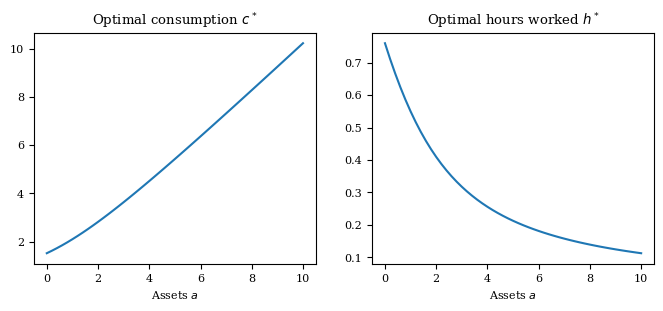

In [23]:
import matplotlib.pyplot as plt

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8, 3))

# Plot optimal consumption vs. assets
ax0.plot(a_grid, c_opt_grid)
ax0.set_title('Optimal consumption $c^*$')
ax0.set_xlabel('Assets $a$')

# Plot optimal consumption vs. assets
ax1.plot(a_grid, h_opt_grid)
ax1.set_title('Optimal hours worked $h^*$')
ax1.set_xlabel('Assets $a$')

<div class="alert alert-info">
<h3> Your turn</h3>

Using the optimal consumption and labor supply choices for each asset level,
compute the implied utility and plot it against the grid of asset levels.

<i>Hint:</i> You can use your implementation of <i>u(c,h)</i>
from the beginning of this lecture for this task.

</div>

***
## Two-period consumption-savings problem

In workshop #3, we solved a two-period consumption-savings problem
using grid search. Here we revisit a variation of this example but instead solve it 
using the minimizers and root-finders from SciPy.

Consider the following standard consumption-savings problem over
two periods with lifetime utility given by
$$
\begin{aligned}
\max_{c_1,~c_2,~a} \enskip & \Bigl\{ u(c_1) + \beta u(c_2) \Bigr\} \\
\text{s.t.} \quad c_1 + a &= y_1 \\
                  c_2 &= (1+r)a + y_2 \\
    c_1 &\geq 0, ~ c_2 \geq 0
\end{aligned}
$$
where $\beta$ is the discount factor,
$r$ is the interest rate,
$(y_1, y_2)$ is exogenous income received in periods 1 and 2, $a$ are assets chosen in period 1, 
and $(c_1,c_2)$ is the optimal consumption allocation
to be determined. Per-period utility $u(c)$ is the CRRA utility function given by
$$
u(c) = \begin{cases}
    \frac{c^{1-\gamma}}{1-\gamma} & \text{if } \gamma \neq 1 \\
    \log(c) & \text{if } \gamma = 1
    \end{cases}
$$
where $\gamma$ is the RRA coefficient and $\log(\bullet)$ denotes
the natural logarithm.

We assume that the household can borrow or save in period 1, i.e., $a$
can be either positive (saving) or negative (borrowing). With this assumption,
the two per-period budget constraints (lines 2-3) can be consolidated into a
single *lifetime* budget constraint,
$$
\underbrace{c_1 + \frac{c_2}{1+r}}_{\text{PV of consumption}} = 
\underbrace{y_1 + \frac{y_2}{1+r}}_{\text{PV of income}}
$$
This lifetime budget constraint states that the present value of 
lifetime consumption (lhs) has to equal the present value of lifetime income (rhs).
Note that this reformulation also eliminates the savings/borring choice $a$ from the problem.

### Analytical solution

To solve the problem, we set up the Lagrangian,
$$
\mathcal{L} = u(c_1) + \beta u(c_2)
    + \lambda \left(y_1 + \frac{y_2}{1+r} - c_1 - \frac{c_2}{c_2} \right)
$$
Taking derivatives with respect to $c_1$ and $c_2$, we obtain the first-order condition
$$
\left.
\begin{aligned}
 \frac{\partial\mathcal{L}}{\partial c_1} &= c_1^{-\gamma} - \lambda &= 0 \\
 \frac{\partial\mathcal{L}}{\partial c_2} &= \beta c_2^{-\gamma} - \lambda\frac{1}{1+r} &= 0
\end{aligned}\right\rbrace
\Longrightarrow
c_1^{-\gamma} = \beta (1+r) c_2^{-\gamma}
$$
The right-most equation is the so-called Euler equation which characterizes
the optimal intertemporal allocation of consumption. It ensures that
the household cannot be better off by shifting one unit of consumption from period 1 to period 2.

It is possible to solve this problem analytically, since from the Euler equation it follows 
that 
$$
c_2 = \Bigl[\beta (1+r)\Bigr]^{\frac{1}{\gamma}} c_1
$$
which can then be substituted into the lifetime budget constraint. Solving 
for $(c_1, c_2)$, we find that
$$
\begin{aligned}
c_1 &= \frac{1}{1 + \beta (1+r)^{\frac{1}{\gamma} - 1}} Y \\
c_2 & = \frac{\beta(1+r)^{\frac{1}{\gamma}}}{1 + \beta(1+r)^{\frac{1}{\gamma} - 1}} Y
\end{aligned}
$$
where $Y = y_1 + \frac{y_2}{1+r}$ is the present value of lifetime income.

### Numerical solution

Let's assume we don't know how to derive the analytical solution, or we are dealing with a variant of the problem were none is available.
The remaining part of this section proceeds to solve the problem numerically.

We first define the per-period utility function $u(c)$:

In [24]:
import numpy as np

def util(c, gamma):
    """
    Compute per-period utility for given consumption.
    """
    if gamma == 1:
        # Log preferences
        u = np.log(c)
    else:
        # General CRRA preferences
        u = c**(1-gamma) / (1-gamma)
    return u

As before, the minimizer is going to operate on a single choice variable (say $c_1$), so we define a function `util_life_c1()` as a function of $c_1$ only and recover $c_2$ from the budget constraint.

In [25]:
def util_life_c1(c1, beta, gamma, y, r):
    """
    Compute lifetime utility of consuming c1, with c2 following from budget 
    constraint.
    """

    # Recover c2 from budget constraint
    c2 = (1+r) * (y - c1)

    # Evaluate period-1 and period-2 utility
    u1 = util(c1, gamma)
    u2 = util(c2, gamma)

    # Compute lifetime utility 
    U = u1 + beta * u2

    return U

We need to choose parameter values to solve the problem numerically. For this we choose standard values used in macroeconomics for models with 1-year periods: $\beta = 0.96$ and $r = 0.04$. We moreover impose log utility ($\gamma = 1$) and assume that the household receives one unit of income $y$ in each period.

In [26]:
# Parameters

beta = 0.96         # discount factor
gamma = 1.0         # relative risk aversion (RRA)
y1 = 1.0            # period-1 income
y2 = 1.0            # period-2 income
r = 0.04            # interest rate (4%)

Finally, we create the function `solve_cons_sav()` which returns the optimal consumption choice for a set of parameters. This is more convenient than directly calling SciPy's 
[`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html)
as we can reuse this function to evaluate the optimal allocation for various sets of parameters.

Note that the function also returns the minimization result object so we can inspect whether the minimizer terminated successfully.


In [27]:
from scipy.optimize import minimize_scalar

def solve_cons_sav(beta, gamma, y1, y2, r):
    """
    Solve consumption-savings problem for given parameters.

    Returns
    -------
    c1_opt: float 
        Optimal period-1 consumption
    c2_opt: float
        Optimal period-2 consumption
    res : OptimizeResult
        Optimization result object
    """

    # Lifetime income
    Y = y1 + y2 / (1+r)

    # Bounds for period-1 consumption (require min. consumption of 1e-8)
    bounds = (1.0e-8, Y - 1.0e-8)

    # Run minimizer, store result object
    res = minimize_scalar(
        lambda x: -util_life_c1(x, beta, gamma, Y, r), 
        bounds=bounds
    )

    # Store optimal period-1 consumption
    c1_opt = res.x

    # Recover implied optimal period-2 consumption from budget constraint
    c2_opt = (1+r) * (Y - c1_opt)

    # Return optimal consumption and the result object
    return c1_opt, c2_opt, res

We can now call this function with the given parameters:

In [28]:
c1_opt, c2_opt, res = solve_cons_sav(beta, gamma, y1, y2, r)

Inspecting the minimization result shows that the minimizer completed successfully:

In [29]:
res

 message: Solution found.
 success: True
  status: 0
     fun: -6.279501240013998e-07
       x: 1.0007849386194374
     nit: 9
    nfev: 9

Finally, we can compare the numerical solution to the exact analytical one. As expected, these are very close (up to the first 6 decimal digits).

In [30]:
# Savings rate out of lifetime income (from analytical solution)
s = 1/(1 + beta * (1+r)**(1/gamma - 1))

# Lifetime income
Y = y1 + y2 / (1+r)

# Analytical consumption choices
c1_exact = s * Y
c2_exact = (beta * (1+r))**(1/gamma) * c1_exact

print(f'Exact solution:\n  c1 = {c1_exact:.8f}\n  c2 = {c2_exact:.8f}')
print(f'Minimizer solution:\n  c1 = {c1_opt:.8f}\n  c2 = {c2_opt:.8f}')

Exact solution:
  c1 = 1.00078493
  c2 = 0.99918367
Minimizer solution:
  c1 = 1.00078494
  c2 = 0.99918366


### How does optimal consumption depend on the interest rate?

With the implementation in hand, we can re-evaluate the solution for a grid of values for the interest rate $r$ to see how consumption optimally responds to changes in the interest rate.

In [31]:
# Grid for interest rate levels
r_grid = np.linspace(0.0, 0.1, 21)

# Allocate arrays to store optimal consumption for each r
c1_opt_grid = np.empty_like(r_grid)
c2_opt_grid = np.empty_like(r_grid)

# Iterate over r, store optimal consumption
for i, r in enumerate(r_grid):
    c1_opt, c2_opt, res = solve_cons_sav(beta, gamma, y1, y2, r)
    c1_opt_grid[i] = c1_opt
    c2_opt_grid[i] = c2_opt

We plot period-1 and period-2 consumption as a function of $r$ in the graph below.

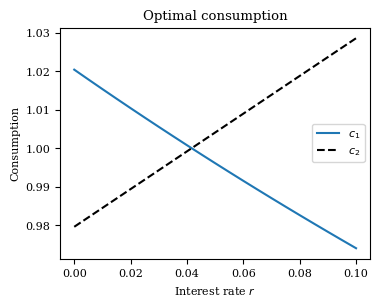

In [32]:
import matplotlib.pyplot as plt


plt.plot(r_grid, c1_opt_grid, label=r'$c_1$')
plt.plot(r_grid, c2_opt_grid, ls='--', color='black', label=r'$c_2$')
plt.xlabel('Interest rate $r$')
plt.ylabel('Consumption')
plt.title('Optimal consumption')
plt.legend()


As you can see, period-1 consumption is decreasing in the interest rate. While this is intuitive, you should understand that this is *not* due to intertemporal substitution in this case since we are using log preferences. In fact, if you inspect the analytical solution for $\gamma = 1$, you will see that period-1 consumption is independent of the interest rate *for a given* $Y$. However, in our setting, total lifetime income decreases as the interest rate increases, so period-1 consumption decreases as well.

In the following mini-exercise, you are asked to investigate the relationship if there is no income in period 2 and hence lifetime income does not depend on $r$.

<div class="alert alert-info">
<h3> Your turn</h3>

Assume that the household is retired in period 2 and therefore does not receive any
labor income, y<sub>2</sub> = 0.

Recompute the solution, leaving the other parameters unchanged. How does period-1 consumption now depend on the interest rate?

</div>

***
## Optional exercises

### Exercise 1: Two-period consumption-savings problem & root-finding

In this exercise, we revisit the two-period consumption-savings problem studied above but use a root-finder to solve it numerically.

To get a single first-order condition, it is convenient to use the Euler equation derived in the lecture and combine it with 
the per-period budget constraints to substitute out $c_1$ and $c_2$, and instead reduce the problem to one nonlinear equation
in one unknown, savings $a$:
$$
(y_1 - a)^{-\gamma} = \beta (1+r) \Bigl((1+r)a + y_2\Bigr)^{-\gamma}
$$

1. Implement a function with the signature

    ```python
    def foc(a, beta, gamma, y1, y2, r):
        """
        Evaluate the first-order condition and return LHS - RHS.
        """
    ```
    which returns the difference between the left-hand side (LHS) and 
    the right-hand side (RHS) of the above equation.
2.  Use the scalar root-finder 
    [`root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html)
    from the `scipy.optimize` package to find the root of this function,
    i.e., the value for $a$ at which the first-order condition holds.
    Use the same parameters as in the lecture: 
    $\beta=0.96$, $\gamma=1$, $y_1 = y_2 = 1$, and $r = 0.04$.
3.  Using the optimal $a$ you found, compute the implied consumption
    levels $(c_1, c_2)$. Make sure they are identical to what we found 
    in the lecture.


***
## Solutions

### Solution for exercise 1

#### Part (1)

We first need to define the function that can be passed to 
[`root_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html)
to find the optimal savings level.

In [33]:
def foc(a, beta, gamma, y1, y2, r):
    """
    Evaluate the first-order condition and return LHS - RHS.
    """

    # Implied period-1 consuption:
    c1 = y1 - a
    # Implied period-2 consumption:
    c2 = (1+r) * a + y2

    # LHS of the Euler equation
    lhs = c1**(-gamma)
    # RHS of the Euler equation
    rhs = beta * (1+r) * c2**(-gamma)

    # difference LHS - RHS (should be zero at the optimum)
    diff = lhs - rhs
    return diff


#### Part (2)

In [34]:
# Parameters

beta = 0.96         # discount factor
gamma = 1.0         # relative risk aversion (RRA)
y1 = 1.0            # period-1 income
y2 = 1.0            # period-2 income
r = 0.04            # interest rate (4%)

We can now call `root_scalar()` to locate the optimal savings level.
We know that savings/borrowing has to be in the interval
$a \in \left[-\frac{y_2}{1+r}, y_1 \right]$
since the non-negativity constraints on consumption would be violated otherwise,
so it's best to use the default `'brentq'` method which takes 
these bounds as an initial bracket.

Note that in the implementation we add/subtract $10^{-8}$ from these bounds
as otherwise consumption is zero and utility is non-finite, which usually
breaks a numerical solver.

In [35]:
from scipy.optimize import root_scalar

# Boundaries for admissible savings (impose minimum consumption of 1e-8)
bounds = (-y2/(1+r) + 1.0e-8, y1 - 1.0e-8)

# Additional arguments to be passed to foc()
args = (beta, gamma, y1, y2, r)

# call root-finder
res = root_scalar(foc, args=args, bracket=bounds)

We can inspect the result object returned by `root_scalar()` to make sure that the algorithm terminated successfully, which is the case here:

In [36]:
res

      converged: True
           flag: converged
 function_calls: 7
     iterations: 6
           root: -0.0007849293563683216
         method: brentq

#### Part (3)

Finally, we can extract the optimal savings level from the root result object and compute the implied consumption levels. These are basically identical to what we found in the lecture.

In [37]:
# Store optimal savings
a_opt = res.root

# Optimal period-1 consumption
c1_opt = y1 - a_opt

# Optimal period-2 consumption
c2_opt = (1+r) * a_opt + y2

print(f'Root-finder solution:\n  c1 = {c1_opt:.8f}\n  c2 = {c2_opt:.8f}')

Root-finder solution:
  c1 = 1.00078493
  c2 = 0.99918367
